(c) 2016 - present, Enplus Advisors, Inc.

In [1]:
import numpy as np
import pandas as pd

from IPython.display import Image

pd.set_option('precision', 2)

def image(name, **kwargs):
    return Image(filename=f'assets/{name}', retina=True, **kwargs)

# Programming with Data<br>Foundations of Python and Pandas

# Lesson 1: Series

## Download slides and exercises

https://github.com/dgerlanc/programming-with-data

Goals:

* pandas has a huge API
* Our goal is to distill some wisdom about python

## Pandas

Expansive library with a huge API.

Distill some `pandas` wisdom.

I try to present a conceptual approach to "Programming with Data",
starting with primitive data types and working up from there.

I like to think about Series in two primary ways (on next slide):


## What is a `Series`?

Series is the building block of `pandas`.

Two ways __I like__ conceptualize them...open to alternatives :-)

### Ordered key-value pairs with homogenous data type


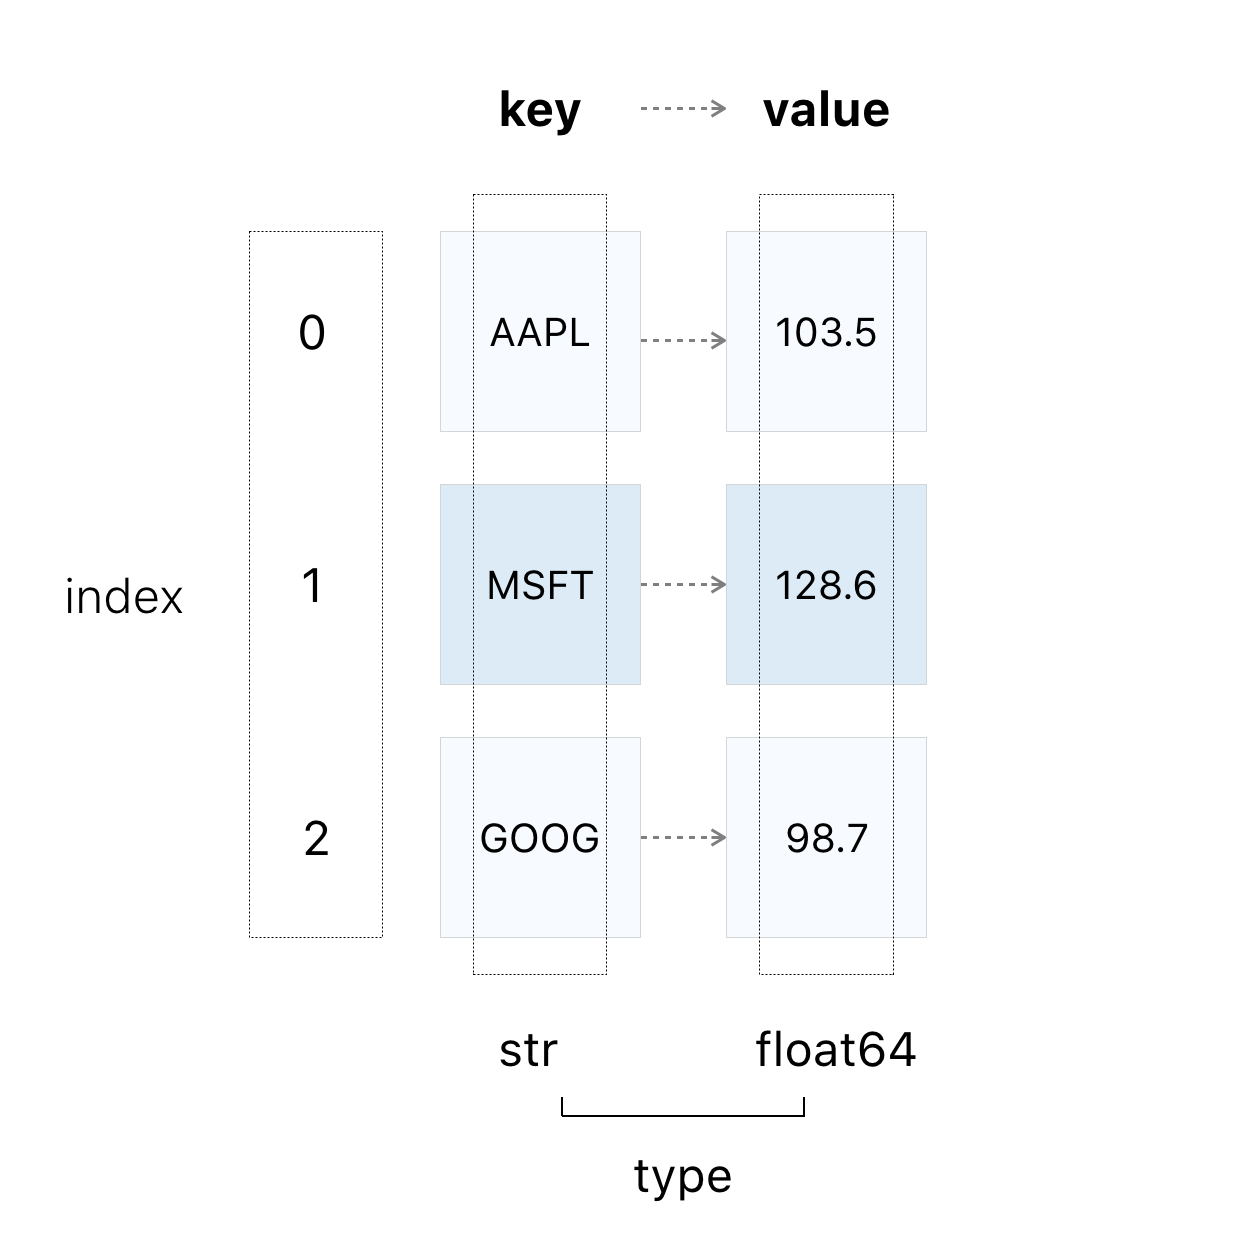

In [2]:
image('lesson-01-key-value.png')

### A label array and a data array

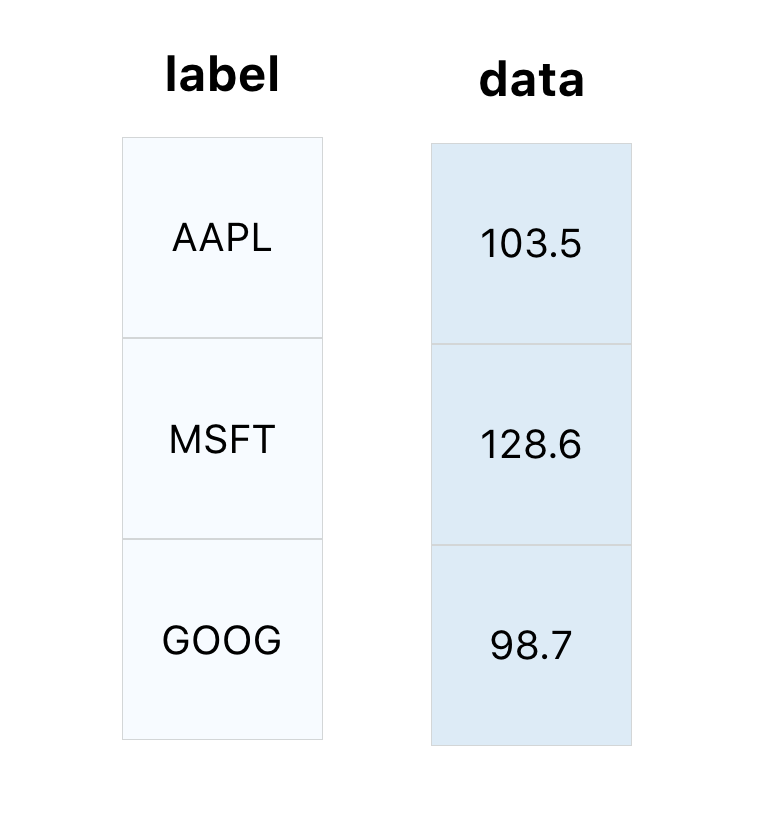

In [3]:
image('data-label-arrays.png')

## Create a simple `Series`

* These are the standard imports we'll assume.
* Let's create a Series.

In [4]:
import numpy as np
import pandas as pd

s = pd.Series([6, 8, 7, 5])
s

0    6
1    8
2    7
3    5
dtype: int64

`dtype` is the `Series` datatype. Corresponds to the `numpy` dtype (mostly).

TODO: Add table of numpy types

In [5]:
s.astype(np.float64)

0    6.0
1    8.0
2    7.0
3    5.0
dtype: float64

## Series from a `pandas` perspective

A series is:
A mapping from an `index` --> `values`

Note: Not required to be unique but some operations are not supported
if there are duplicates, e.g., unstacking

This is important because the index determines alignment of pandas
objects, as we will see shortly.

### Series - Implicit Index

In [6]:
s = pd.Series([6, 8, 7, 5])

In [7]:
s.index

RangeIndex(start=0, stop=4, step=1)

If you don't provide explicit labels you get increasing integer labels.

In [8]:
s.array

<PandasArray>
[6, 8, 7, 5]
Length: 4, dtype: int64

`s.array` is a `numpy` compatible array

### Series - Explicit Index

In [9]:
s1 = pd.Series([6, 8, 7, 5], index=['b', 'd', 'c', 'a'])
s1

b    6
d    8
c    7
a    5
dtype: int64

In [10]:
s1.index

Index(['b', 'd', 'c', 'a'], dtype='object')

Now we have a new kind of `Index`, but the values stay the same.

In [11]:
s1.array # pandas > 0.24.0

<PandasArray>
[6, 8, 7, 5]
Length: 4, dtype: int64

## Series from `dict`

Can also create a series from a `dict`.

`dict`s preserve insertion order since Python 3.6 so you can no longer
rely on `pandas` automatically sorting the index

In [12]:
s2 = pd.Series({'b': 6, 'd': 8, 'c': 7, 'a': 5})
s2

b    6
d    8
c    7
a    5
dtype: int64

## Selecting from a `Series`

* Label: `loc`
* Position: `iloc`

### Selection by position

In [13]:
s2.iloc[0] # also s2[0] (sometimes)

6

In [14]:
# shortcut method
s2[0]

6

### Selection by label

In [15]:
s2.loc['a'] #a also s['a'] sometimes

5

In [16]:
# shortcut method
s2['a']

5

### Vectorized selection

In [17]:
s2[['a', 'c']]

a    5
c    7
dtype: int64

Note how all of the selection operations preserve the index.

## Filtering

All operations are vectorized over the `Series`

In [18]:
idx = s2 > 5
idx

b     True
d     True
c     True
a    False
dtype: bool

In [19]:
# Selecting with a boolean vector
s2[idx]

b    6
d    8
c    7
dtype: int64

### Filtering with compound statements

In [20]:
idx = (6 < s2) & (s2 < 100)
idx

b    False
d     True
c     True
a    False
dtype: bool

`&` binds more tightly than comparison operators so you need parentheses.

### Filtering - Missing Data

Pandas has decent support for missing data.

In [21]:
s3 = pd.Series([6, 8, np.nan, 7], dtype='Int64')
s3

0      6
1      8
2    NaN
3      7
dtype: Int64

In [22]:
s3.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [23]:
s3[pd.notnull(s3)]

0    6
1    8
3    7
dtype: Int64

Note the preservation of labels (index)

## Types of Missing Data

In [24]:
s4 = pd.Series([1, 2, 3, np.nan, 5], index=list('abcde'))

What is the `dtype` of `s4`?

In [25]:
s4

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
dtype: float64

WARNING: There is no integer NA type in `pandas < 0.24.0`

## Alignment

Operations in `pandas` are implicitly aligned by index!

In [26]:
s5 = pd.Series([6, 8, 7, 5], index=list('abcd'))
s6 = pd.Series([1, 2, 3, np.nan, 5], index=list('abcde'))

TODO: Show above horizontally

In [27]:
s5 + s6

a     7.0
b    10.0
c    10.0
d     NaN
e     NaN
dtype: float64

Performs an outer join, filling missing levels with NAs